<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Tarea Semanal Nº5
#### Gisela Farace

## Consigna

#### Primeros pasos en la estimación espectral <br>
En esta tarea semanal analizaremos un fenómeno muy particular que se da al calcular la DFT, el efecto de desparramo espectral.

Luego, haremos el siguiente experimento:

Senoidal de frecuencia $f_{0}=k_{0}∗f_{S}/N = k_{0}.Δf$
energía normalizada, es decir energía (o varianza) unitaria

Se pide:

a) Sea $k_{0}={N/4, N/4 + 0.025, N/4 + 0.5}$. Notar que a cada senoidal se le agrega una pequeña desintonía respecto a Δf. Graficar las tres densidades espectrales de potencia (PDS's) y discutir cuál es el efecto de dicha desintonía en el espectro visualizado.

b) Verificar la potencia unitaria de cada PSD. En base a la teoría estudiada, ¿cuál es la razón por la cual una señal senoidal tiene un espectro (PSD) tan diferente respecto a otra de muy pocos Hertz de diferencia?

Bonus:

Repetir el experimento mediante la técnica de zero padding. Dicha técnica consiste en agregar ceros al final de la señal para aumentar Δf de forma ficticia. Probar agregando un vector de 9*N ceros al final. Discuta los resultados obtenidos.

## Código

#### Importación de librerias

In [9]:
# Importación de módulos para Jupyter

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as sig

#Presentación de los gŕaficos
mpl.rcParams['figure.figsize'] = (17,5)
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

#### Funciones

In [10]:
def senoidal(vmax, dc, ff, ph, nn, fs):
    ts = 1/fs # tiempo de muestreo
    df = fs/nn # resolución espectral 
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (nn-1)*ts, nn).flatten()
    
    # grilla de sampleo frecuencial
    sen = vmax*np.sin(2*np.pi*ff*tt + ph)+dc
    
    return tt, sen

def fft(xx, N):
    ft = np.fft.fft(xx, axis=0)
    ft = ft/N
    return ft

(-100.0, 5.0)

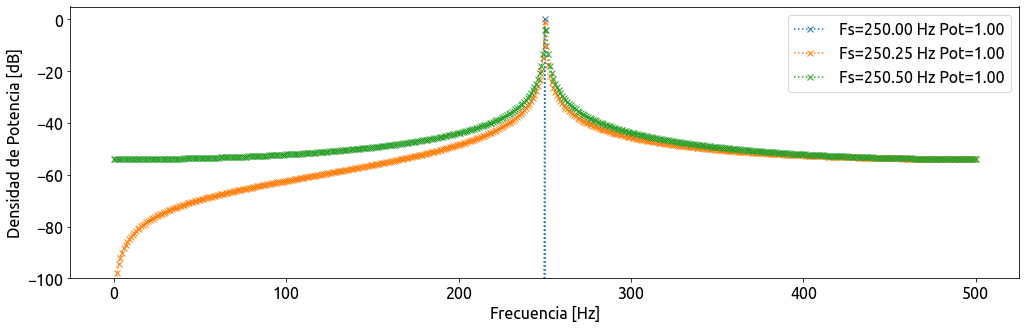

In [11]:
# datos de la senoidal
vmax = 1
dc = 0
ph = 0
N = 1000  # cantidad de muestras
fs = 1000 # frecuencia de muestreo (Hz)
df = fs/N # resolucion espectral

freq=[(N/4)*(fs/N),(N/4)*(fs/N)+0.25,(N/4)*(fs/N)+0.5]
j = 0
pot = [0,0,0]

for ff in freq:
    tt,xx = senoidal(vmax, dc, ff, ph, N, fs)
    xx_nor = xx/np.sqrt(np.var(xx,axis=0)) #Normalizo la señal
    fft_xx = fft(xx_nor, N)
    pot[j]=np.sum(np.abs(fft_xx)**2) #Potencia
    df=fs/N
    f = np.linspace(0, (N-1), N)*df
    bfrec = f <= fs/2
    #busco graficar en db para que se vea mejor
    plt.plot(f[bfrec], 10*np.log10(2*np.abs(fft_xx[bfrec])**2),'x:')  
    j+=1

plt.legend(['Fs={:3.2f} Hz Pot={:1.2f}'.format(freq[0], pot[0]),'Fs={:3.2f} Hz Pot={:1.2f}'.format(freq[1], pot[1]),'Fs={:3.2f} Hz Pot={:1.2f}'.format(freq[2], pot[2])])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de Potencia [dB]')
plt.ylim(-100,5)

A partir del gráfico se puede observar el efecto del desparramo espectral, y esto se debe a la desintonía provocada por el corrimiento de $\Delta f$. Al hacer la FFT de nuestra señal la estamos multiplicando por una ventana, que al pasarlo al espectro de frecuencia corresponde a una convolución entre el especto de la señal (una delta) y un Kernel de Dirichtlet. Este kernel se monta sobre la delta, y si la frecuencia no es múltiplo de la resolución espectral, entonces observaremos otras componentes de potencia pertenecientes al kernel de Dirichlet. En el caso donde Fs es 250Hz, observamos una delta ya que en los bins adyacentes existe un cruce por cero, lo que hace que haya potencia pero mucho más abajo de los -100dB, lo podríamos considerar como -$\infty$.
En los tres casos se pudo verificar la conservación de la potencia, que es 1. La potencia no cambia aunque haya cambiado la morfología, solamente se redistribuye o se "desparrama". 

### Zero Padding

(-50.0, 5.0)

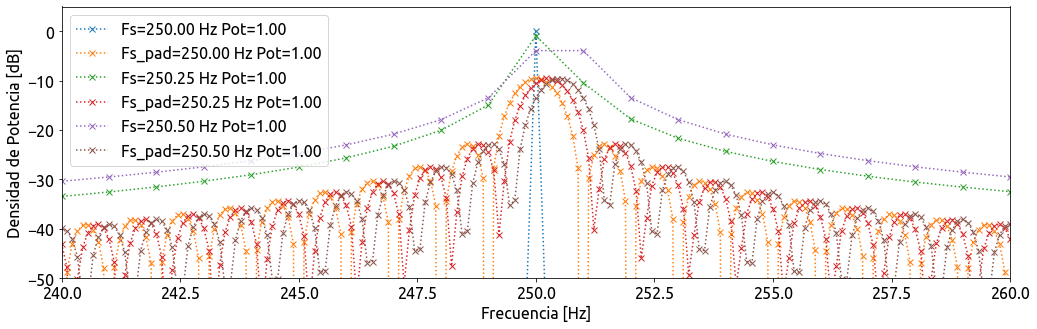

In [12]:
# datos de la senoidal
vmax = 1
dc = 0
ph = 0
N = 1000  # cantidad de muestras
fs = 1000 # frecuencia de muestreo (Hz)
Npad = 9*N
df = fs/Npad # resolucion espectral
freq=[(Npad/4)*(fs/Npad),(Npad/4)*(fs/Npad)+0.25,(Npad/4)*(fs/Npad)+0.5]
j = 0
pot = [0,0,0]
pot_pad = [0,0,0]

for ff in freq:
    tt,xx = senoidal(vmax, dc, ff, ph, N, fs)
    xx_nor = xx/np.sqrt(np.var(xx,axis=0)) #Normalizo la señal
    #agrego los ceros
    xx_pad = xx_nor.copy() 
    xx_pad.resize(Npad)
    xx_pad = xx_pad/np.sqrt(np.var(xx_pad,axis=0)) #Normalizo la señal
    fft_xx = fft(xx_nor, N)
    fft_xx_pad = fft(xx_pad, Npad)
    pot[j] = np.sum(np.abs(fft_xx)**2) #Potencia
    pot_pad[j] = np.sum(np.abs(fft_xx_pad)**2) #Potencia padding
    f1 = np.linspace(0, (N-1), N)*fs/N
    bfrec1 = f1 <= fs/2
    f = np.linspace(0, (Npad-1), Npad)*df
    bfrec = f <= fs/2
    #busco graficar en db para que se vea mejor
    plt.plot(f1[bfrec1], 10*np.log10(2*np.abs(fft_xx[bfrec1])**2),'x:')  
    plt.plot(f[bfrec], 10*np.log10(2*np.abs(fft_xx_pad[bfrec])**2),'x:')  
    j+=1

plt.legend(['Fs={:3.2f} Hz Pot={:1.2f}'.format(freq[0], pot[0]),'Fs_pad={:3.2f} Hz Pot={:1.2f}'.format(freq[0], pot_pad[0]),'Fs={:3.2f} Hz Pot={:1.2f}'.format(freq[1], pot[1]),'Fs_pad={:3.2f} Hz Pot={:1.2f}'.format(freq[1], pot_pad[1]),'Fs={:3.2f} Hz Pot={:1.2f}'.format(freq[2], pot[2]),'Fs_pad={:3.2f} Hz Pot={:1.2f}'.format(freq[2], pot_pad[2])])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlim(240,260)
plt.ylim(-50,5)

En el gráfico se pueden comparar el espectro con y sin zero padding, en todos los casos con potencia unitaria. La técnica de zero padding consiste en agregar ceros a la muestra para hacer una nueva ventana más grande, por lo tanto la nueva $\Delta f_{padding}$ es más chica que la $\Delta f$ original. De esta forma se pueden visualizar el espectro del Kernel de Dirichlet. Se pueden ver los kernels de Dirichlet montados sobre la delta correspondiente (250Hz, 250,25Hz y 250,5Hz). Se observa que las potencias con zero padding no se encuentran a la misma altura que las de sin padding, esto se debe a que para conservar el área en el kernel, como está desparramado el lóbulo principal se hace más chico.

(-30.0, 5.0)

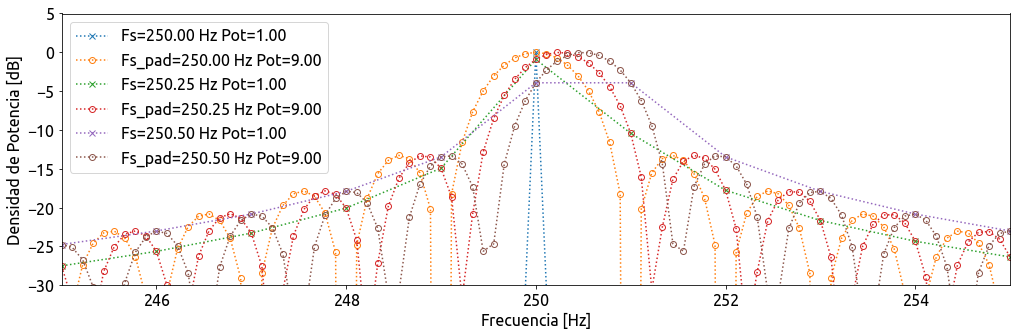

In [14]:
# datos de la senoidal
vmax = 1
dc = 0
ph = 0
N = 1000  # cantidad de muestras
fs = 1000 # frecuencia de muestreo (Hz)
Npad = 9*N
df = fs/Npad # resolucion espectral
freq=[(Npad/4)*(fs/Npad),(Npad/4)*(fs/Npad)+0.25,(Npad/4)*(fs/Npad)+0.5]
j = 0
pot = [0,0,0]
pot_pad = [0,0,0]

for ff in freq:
    tt,xx = senoidal(vmax, dc, ff, ph, N, fs)
    xx_nor = xx/np.sqrt(np.var(xx,axis=0)) #Normalizo la señal
    #agrego los ceros
    xx_pad = xx_nor.copy() 
    xx_pad.resize(Npad)
    xx_pad = (Npad/N)*xx_pad
    fft_xx = fft(xx_nor, N)
    fft_xx_pad = fft(xx_pad, Npad)
    pot[j] = np.sum(np.abs(fft_xx)**2) #Potencia
    pot_pad[j] = np.sum(np.abs(fft_xx_pad)**2) #Potencia padding
    f1 = np.linspace(0, (N-1), N)*fs/N
    bfrec1 = f1 <= fs/2
    f = np.linspace(0, (Npad-1), Npad)*df
    bfrec = f <= fs/2
    #busco graficar en db para que se vea mejor
    plt.plot(f1[bfrec1], 10*np.log10(2*np.abs(fft_xx[bfrec1])**2),'x:')  
    plt.plot(f[bfrec], 10*np.log10(2*np.abs(fft_xx_pad[bfrec])**2),'o:',mfc='none')  
    j+=1

plt.legend(['Fs={:3.2f} Hz Pot={:1.2f}'.format(freq[0], pot[0]),'Fs_pad={:3.2f} Hz Pot={:1.2f}'.format(freq[0], pot_pad[0]),'Fs={:3.2f} Hz Pot={:1.2f}'.format(freq[1], pot[1]),'Fs_pad={:3.2f} Hz Pot={:1.2f}'.format(freq[1], pot_pad[1]),'Fs={:3.2f} Hz Pot={:1.2f}'.format(freq[2], pot[2]),'Fs_pad={:3.2f} Hz Pot={:1.2f}'.format(freq[2], pot_pad[2])])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlim(245,255)
plt.ylim(-30,5)

Si en vez de normalizar en potencia lo escalo para que los kernels coincidan con el espectro sin padding se puede observar como coinciden, y se puede visualizar como es la convolución entre el kernel y la delta.